# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric and our analysis? 
The analysis does not account for outliers. In the order values there are a few that are much larger than the rest by a factor of a thousand. These outliers have an extremely large effect on the metrics in the data set and skewed them towards the outliers.

- Propose some new metrics that better represents the behavior of the stores' customers. Why are these metrics better? You can propose as many new metrics as you wish but quality heavily outweights quantity.
Some better metrics to use would be the median, and the order price when excluding some of the outliers. 

Median
Excluding large order values
Excluding large prices or large total items

- Find the values of your new metrics.
Median = 284.0
Mean excluding order values greater than or equal to 10000 = 302.58051448247926
Mean excluding shoe prices of 500 or greater and total items less than 100 = 302.58051448247926

I think the mean excluding the shoe prices of values of greater than 500 and total items less than 100 as this excludes orders with a shoe(s) with super high values and orders with a high number of items. I found that there was one order with a much higher number of shoes ordered than the rest, which disrupted the data significantly. Using this, we are able to maintain a balance of small and large orders.

- Report any other interesting findings.
What I found interesting is that when excluding shoes of high value, it did not have much effect on the mean value of the orders. This means that the large orders have a high number of shoes that are moderately priced.

Show all of your work in this notebook.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("orders.csv")
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [9]:
df['order_value'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_value, dtype: float64

<AxesSubplot: ylabel='Frequency'>

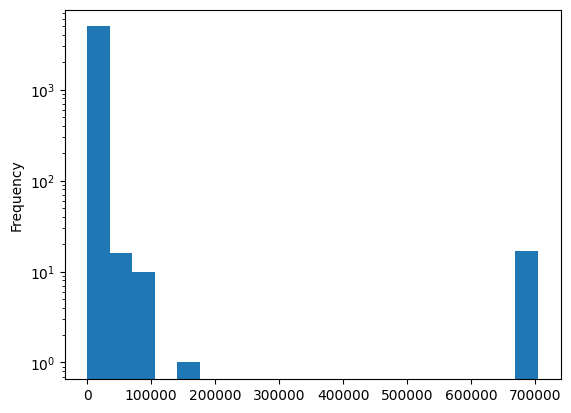

In [20]:
df['order_value'].plot.hist(bins=20, logy=True)

In [ ]:
We need to filter out the extreme outliers that have a large effect on the mean of the order value.

In [12]:
df['order_value'].median()

284.0

In [28]:
df['price'] = df['order_value'] / df['total_items']

<AxesSubplot: ylabel='Frequency'>

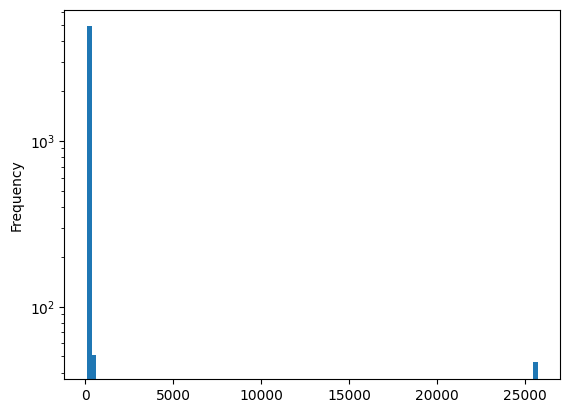

In [30]:
df['price'].plot.hist(bins=100, logy=True)

<AxesSubplot: ylabel='Frequency'>

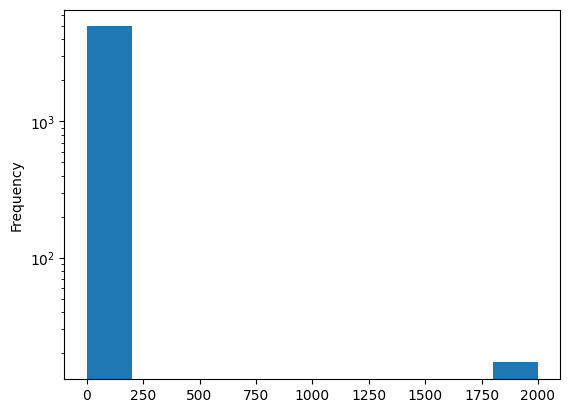

In [55]:
df['total_items'].plot.hist(logy=True)

In [42]:
df[df['price']<5000].describe()

,order_id,shop_id,user_id,order_value,total_items,price
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


In [56]:
df[df['total_items']<1000].describe()

,order_id,shop_id,user_id,order_value,total_items,price
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398,387.86474
std,1443.090253,29.051718,86.800308,5314.092293,0.98318,2446.12562
min,1.000000,1.000000,700.000000,90.000000,1.00000,90.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000,133.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000,153.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000,168.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000,25725.00000


In [57]:
df[(df['price']<500) & (df['total_items']< 100)]['order_value'].mean()

302.58051448247926